 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt 

from functools import reduce

sns.set_theme()

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path('Resources/whale_returns.csv')

df_whale = pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [3]:
# Count nulls
num_na = df_whale.isna().values.sum()
print(f'There are {num_na} null values')

There are 4 null values


In [4]:
# Drop nulls
df_whale.dropna(axis=0, inplace=True)
df_whale.sort_index(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path('Resources/algo_returns.csv')

df_algo = pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
df_algo.shape

(1241, 2)

In [6]:
# Count nulls
num_na = df_algo.isna().values.sum()
print(f'There are {num_na} null values')

There are 6 null values


In [7]:
# Drop nulls
df_algo.dropna(axis=0, inplace=True)
df_algo.sort_index(inplace=True)

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path = Path('Resources/sp500_history.csv')
df_sp500 = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
df_sp500.sort_index(inplace=True)
df_sp500.shape

(1649, 1)

In [9]:
# Check Data Types
df_sp500.dropna(axis=0, inplace=True)
print(df_sp500.dtypes)
df_sp500.head()

Close    object
dtype: object


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [10]:
# Fix Data Types
df_sp500 = df_sp500.replace('[\$,]', '', regex=True).astype(float)
df_sp500.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
df_sp500['sp500_returns'] = df_sp500.pct_change()

In [12]:
# Drop nulls
df_sp500.dropna(axis=0, inplace=True)

In [13]:
# Rename `Close` Column to be specific to this portfolio.
df_sp500.rename(columns={'Close':'sp500'}, inplace=True) 
df_sp500.head()

,sp500,sp500_returns
Date,,
2012-10-02,1445.75,0.000872
2012-10-03,1450.99,0.003624
2012-10-04,1461.40,0.007174
2012-10-05,1460.93,-0.000322
2012-10-08,1455.88,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns = pd.concat([df_whale, df_algo, df_sp500.sp500_returns], axis=1, join='inner')
daily_returns = daily_returns.rename(columns={'sp500_returns':'sp500'})
daily_returns.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

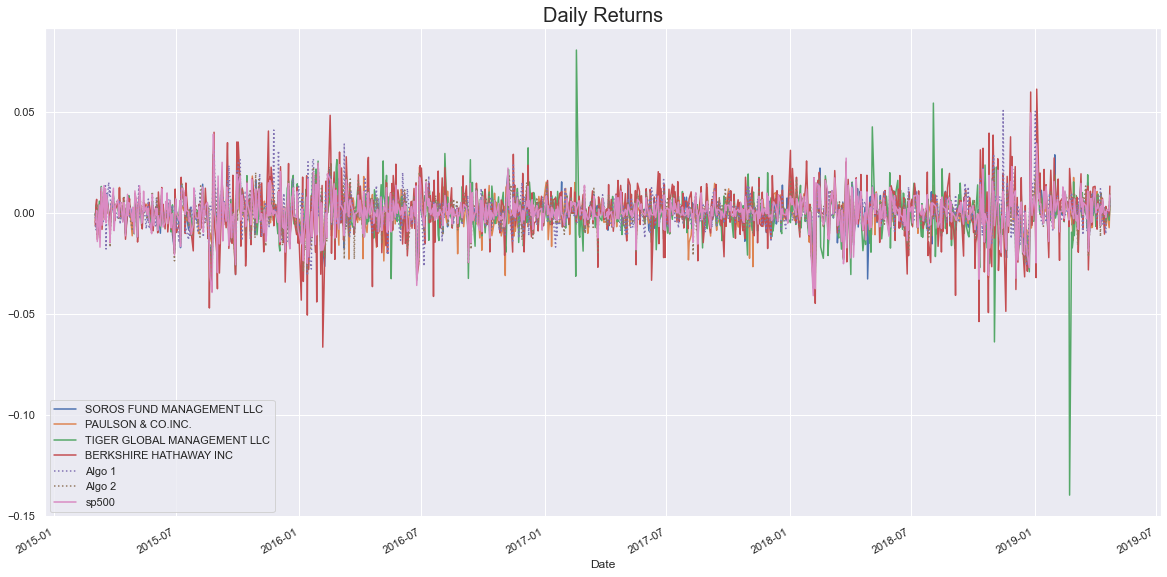

In [15]:
# Plot daily returns of all portfolios
ax = daily_returns.plot(figsize=(20, 10), legend=True,style=['-','-','-','-',':',':'])
ax.set_title('Daily Returns', fontsize=20)
None # just to have clean output

#### Calculate and Plot cumulative returns.

In [115]:
# Calculate cumulative returns of all portfolios

def compute_cumulative_returns(daily_returns):
    
    cumulative_returns = (1 + daily_returns).cumprod().dropna()
    return cumulative_returns

cumulative_returns = compute_cumulative_returns(daily_returns)
print(f'Final cumulative return \n{cumulative_returns.iloc[-1]}')

Final cumulative return 
SOROS FUND MANAGEMENT LLC      1.164568
PAULSON & CO.INC.              0.779646
TIGER GLOBAL MANAGEMENT LLC    0.861189
BERKSHIRE HATHAWAY INC         1.553401
Algo 1                         1.934691
Algo 2                         1.269247
sp500                          1.385517
Name: 2019-04-23 00:00:00, dtype: float64


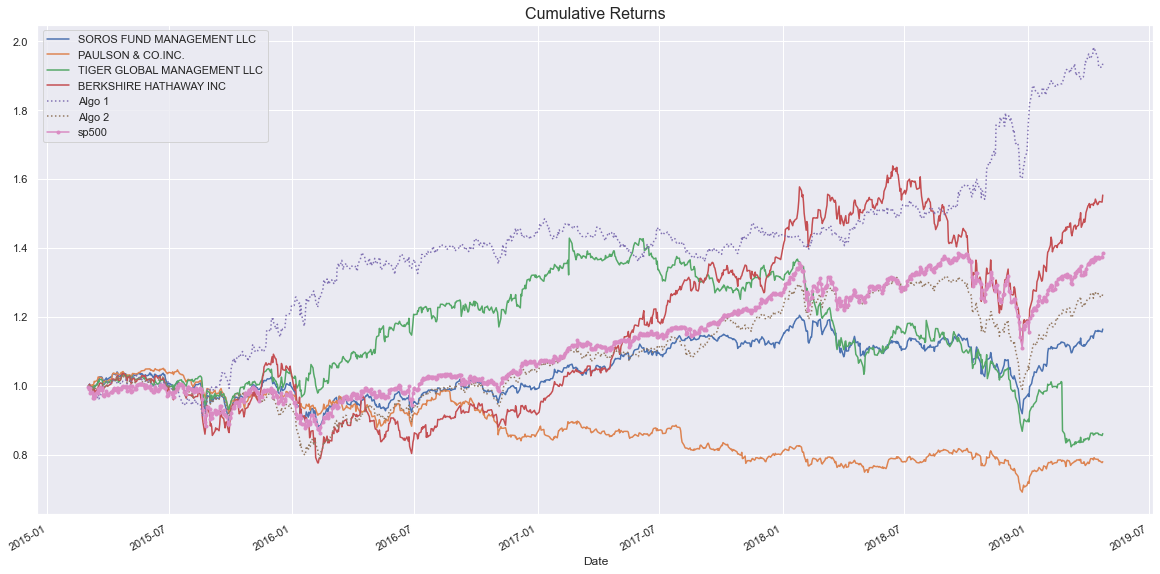

In [68]:
# Plot cumulative returns
ax = cumulative_returns.plot(figsize=(20, 10), style=['-','-','-','-',':',':','.-'])
ax.set_title('Cumulative Returns', fontsize=16)
None

In [69]:
indexes_outperformer = cumulative_returns.iloc[-1,:][cumulative_returns.iloc[-1,:] > cumulative_returns.iloc[-1,:]['sp500']].keys()
print('Portfolios that outperformed S&P500:')
print(*indexes_outperformer, sep='\n')

Portfolios that outperformed S&P500:
BERKSHIRE HATHAWAY INC
Algo 1


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


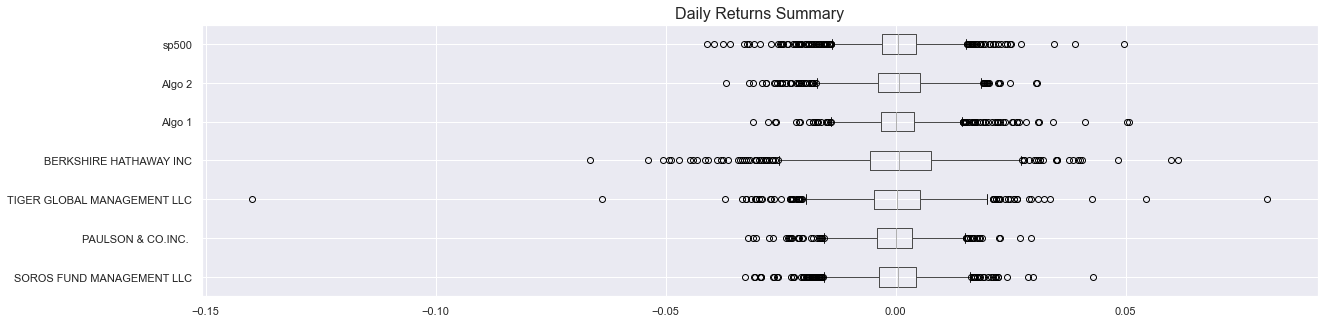

In [70]:
# Box plot to visually show risk
ax = daily_returns.boxplot(figsize=(20, 5), vert=False)
ax.set_title('Daily Returns Summary', fontsize=16)
None

### Calculate Standard Deviations

In [71]:
# Calculate the daily standard deviations of all portfolios
portfolios_std = daily_returns.std()
print(portfolios_std)

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
sp500                          0.008554
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [73]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = portfolios_std['sp500']

# Determine which portfolios are riskier than the S&P 500
portfolios_2_print = (portfolios_std[portfolios_std > sp500_std].index.values)
print(f'Portfolios that are riskier than S&P500:')
print(*portfolios_2_print, sep='\n')

Portfolios that are riskier than S&P500:
TIGER GLOBAL MANAGEMENT LLC
BERKSHIRE HATHAWAY INC


### Calculate the Annualized Standard Deviation

In [74]:
# Calculate the annualized standard deviation (252 trading days)
portfolios_std_annualized = portfolios_std * np.sqrt(252)
print(portfolios_std_annualized)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
sp500                          0.135786
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

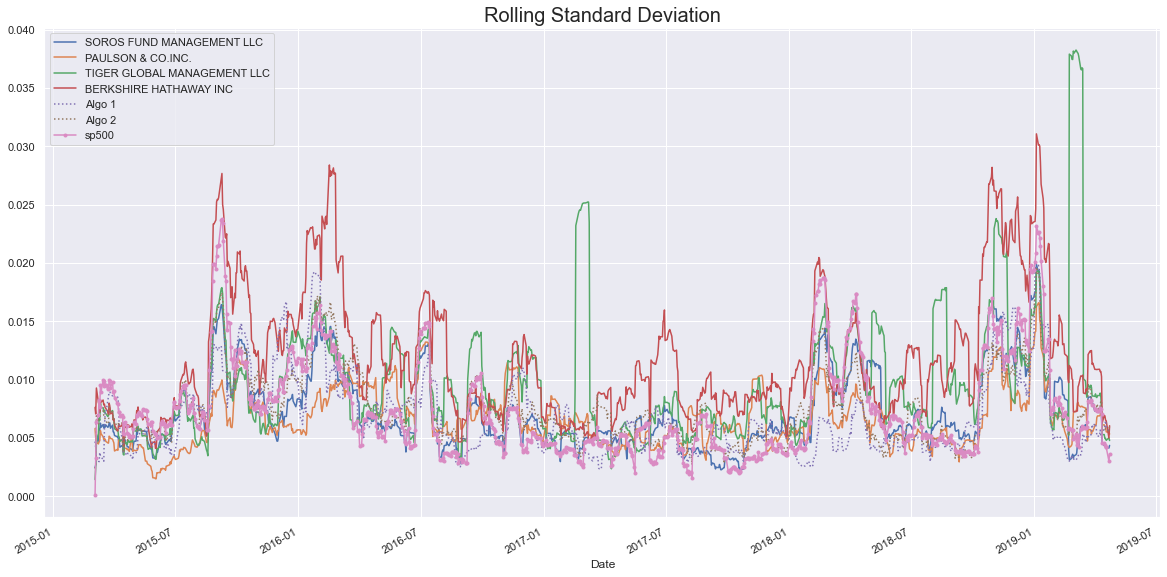

In [75]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
window_21 = pd.Timedelta(21, unit="d")

rolling_std = daily_returns.rolling(window_21).std()

# Plot the rolling standard deviation
ax = rolling_std.plot(figsize=(20, 10), 
                    style=['-','-','-','-',':',':','.-'],
                    legend=True)
ax.set_title('Rolling Standard Deviation',
            fontsize=20)
None

### Calculate and plot the correlation

Portfolio Algo 2 is the most correlated with SP500


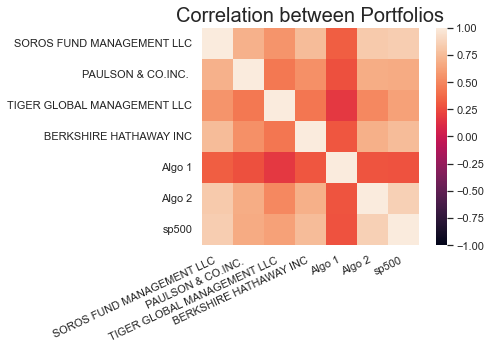

In [116]:
# Calculate the correlation

def plot_correlation(daily_returns):

    portfolio_correlation = daily_returns.corr()
    # Display de correlation matrix
    ax = sns.heatmap(portfolio_correlation, 
                    xticklabels=portfolio_correlation.columns,
                    yticklabels=portfolio_correlation.columns,
                    vmin=-1,
                    vmax=1,
                    square=True)

    ax.set_title('Correlation between Portfolios', fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
    return portfolio_correlation

portfolio_correlation = plot_correlation(daily_returns)
# we get index and key for the portfolio that is the most correlated with S&P500
idx_best = portfolio_correlation.loc['sp500', portfolio_correlation.keys() != 'sp500'].argmax()
key_best = daily_returns.keys()[idx_best]
print(f'Portfolio {key_best} is the most correlated with SP500')

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [78]:
# define window for rolling average
window_60 = pd.Timedelta(60, unit="d")
best_sp500_rolling_cov = daily_returns['sp500'].rolling(window_60).cov(daily_returns[key_best])

In [79]:
#remove NA
best_sp500_rolling_cov.dropna(inplace=True)

In [80]:
#rolling variance for S&P500
sp500_rolling_var = daily_returns['sp500'].rolling(window_60).var()

In [81]:
#beta for the most correlated portfolio
beta_best_sp500_rolling = best_sp500_rolling_cov/sp500_rolling_var
beta_best_sp500_rolling.dropna(inplace=True)

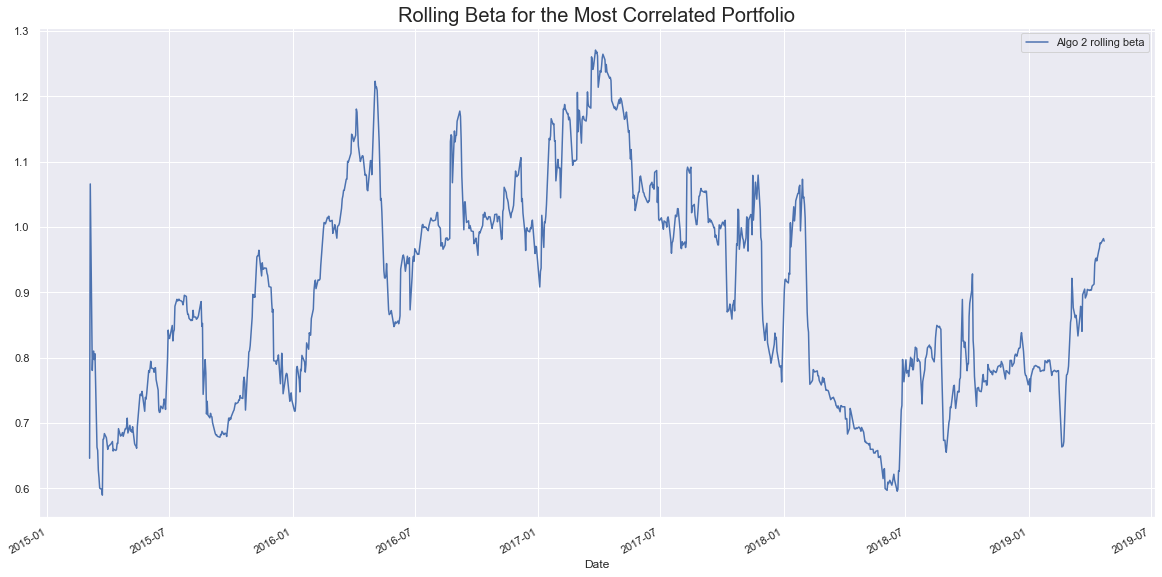

In [84]:
#plot rolling beta
fig, ax = plt.subplots()
beta_best_sp500_rolling[1:].plot(figsize=(20,10),ax=ax)
ax.set_title('Rolling Beta for the Most Correlated Portfolio', fontsize=20)
ax.legend([f'{key_best} rolling beta'])
None

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [85]:
# Use `ewm` to calculate the rolling window
half_life = 21
#best_sp500_ewm_cov = daily_returns['sp500'].ewm(halflife=half_life, times=daily_returns.index).cov(daily_returns[key_best])
best_sp500_ewm_cov = daily_returns['sp500'].ewm(halflife=half_life).cov(daily_returns[key_best])
best_sp500_ewm_cov.dropna(inplace=True)

In [86]:
#rolling variance
#sp500_ewm_var = daily_returns['sp500'].ewm(halflife=half_life, times=daily_returns.index).var()
sp500_ewm_var = daily_returns['sp500'].ewm(halflife=half_life).var()
sp500_ewm_var.dropna(inplace=True)

In [87]:
#rolling beta for exponentially weighted averages
beta_best_sp500_ewm = best_sp500_ewm_cov/sp500_ewm_var

beta_best_sp500_ewm.dropna(inplace=True)

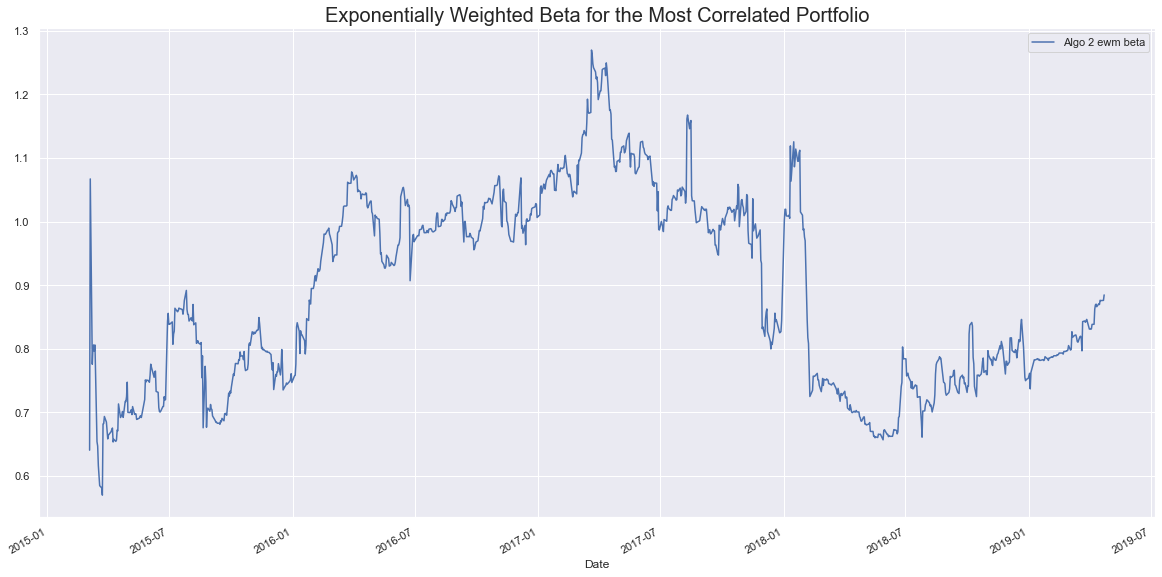

In [88]:
fig, ax = plt.subplots()
beta_best_sp500_ewm[1:].plot(figsize=(20,10),ax=ax)
ax.set_title('Exponentially Weighted Beta for the Most Correlated Portfolio', fontsize=20)
ax.legend([f'{key_best} ewm beta'])
plt.show()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of tw_60o portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [89]:
# Annualized Sharpe Ratios
annualized_sharpe_ratios = daily_returns.mean() * 252 / portfolios_std_annualized

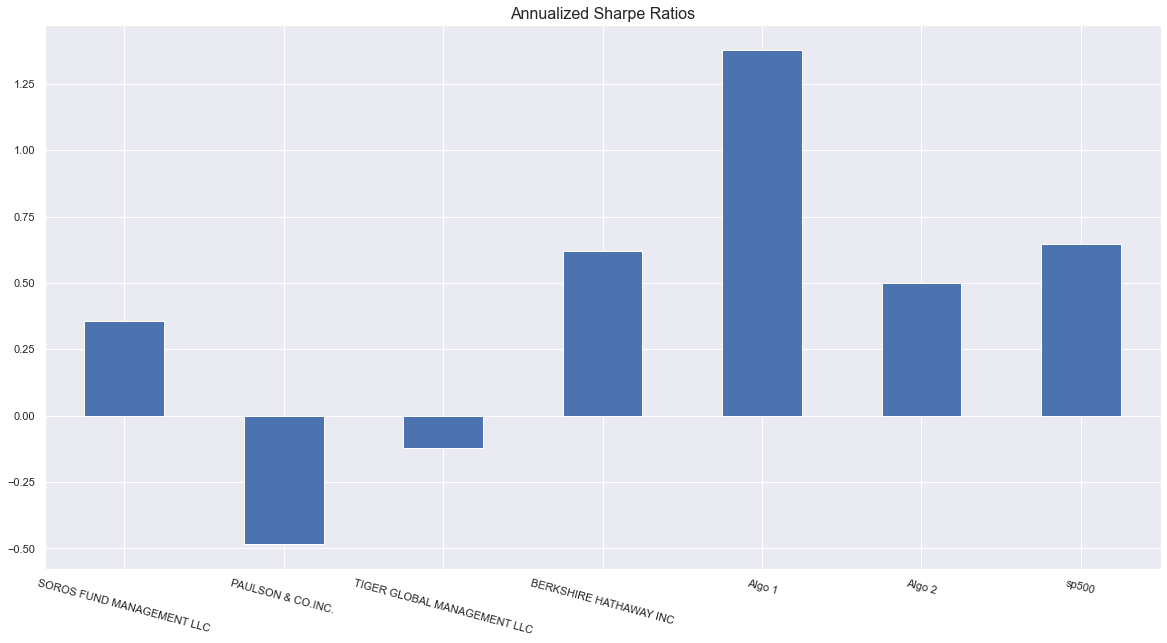

In [120]:
# Visualize the sharpe ratios as a bar plot
def plot_annualized_sharpe(annualized_sharpe_ratios):
    ax= annualized_sharpe_ratios.plot.bar(rot=-15,figsize=(20,10))
    ax.set_title('Annualized Sharpe Ratios', fontsize=16)
    plt.show()
plot_annualized_sharpe(annualized_sharpe_ratios)

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Both Algo 1 has larger annualized Sharpe ratio than whale portfolios. Algo 2 has a bit smaller Sharpe ration than S&P500. Algo 1 has larger Sharpe than S&P 500 and it outperformed S&P500, so it is better strategy than index investment. Berkshare Hathaway is also outperfoms S&P500 and other whale portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [92]:
# Reading data from 1st stock
aapl_path = Path('Resources/google_finance_aapl.csv')
df_aapl = pd.read_csv(aapl_path, parse_dates=True, index_col='Date')
df_aapl.sort_index(inplace=True)

In [93]:
# Reading data from 2nd stock
googl_path = Path('Resources/google_finance_googl.csv')
df_googl = pd.read_csv(googl_path, parse_dates=True, index_col='Date')
df_googl.sort_index(inplace=True)

In [94]:
# Reading data from 3rd stock
bac_path = Path('Resources/google_finance_bac.csv')
df_bac = pd.read_csv(bac_path, parse_dates=True, index_col='Date')
df_bac.sort_index(inplace=True)

In [95]:
# Reading data from 4th stock
v_path = Path('Resources/google_finance_v.csv')
df_v = pd.read_csv(v_path, parse_dates=True, index_col='Date')
df_v.sort_index(inplace=True)

In [96]:
# Reading data from 5th stock
fdx_path = Path('Resources/google_finance_fdx.csv')
df_fdx = pd.read_csv(fdx_path, parse_dates=True, index_col='Date')
df_fdx.sort_index(inplace=True)

In [97]:
# Combine all stocks in a single DataFrame
df_2_merge = [df_aapl, df_googl, df_v, df_fdx, df_bac]
stock_prices = reduce(lambda  left,right: pd.merge(left, right,left_index=True, right_index=True,
                                            how='inner'), df_2_merge)

In [98]:
# Reset Date index
#no need    

In [99]:
# Reorganize portfolio data by having a column per symbol
#done

In [100]:
# Calculate daily returns
stock_returns = stock_prices/stock_prices.shift(1) - 1

# Drop NAs
stock_returns.dropna(inplace=True)
# Display sample data
stock_returns.head()

,aapl,googl,v,fdx,bac
Date,,,,,
2015-03-03,0.002169,0.006556,-0.010637,-0.003676,0.001874
2015-03-04,-0.006184,-0.000795,-0.005666,-0.008686,-0.012469
2015-03-05,-0.016801,0.005360,0.001315,0.001145,0.010101
2015-03-06,0.001582,-0.014671,-0.017511,-0.009324,0.013750
2015-03-09,0.004423,0.002095,0.007872,-0.001617,-0.003083


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [101]:
# Set weights
weights = [1/5, 1/5, 1/5, 1/5, 1/5]
my_portfolio_prices = pd.DataFrame(stock_prices.dot(weights),columns=['my_portfolio'])

# Calculate portfolio return
my_portfolio_returns = my_portfolio_prices/my_portfolio_prices.shift(1) - 1
my_portfolio_returns.dropna(inplace=True)

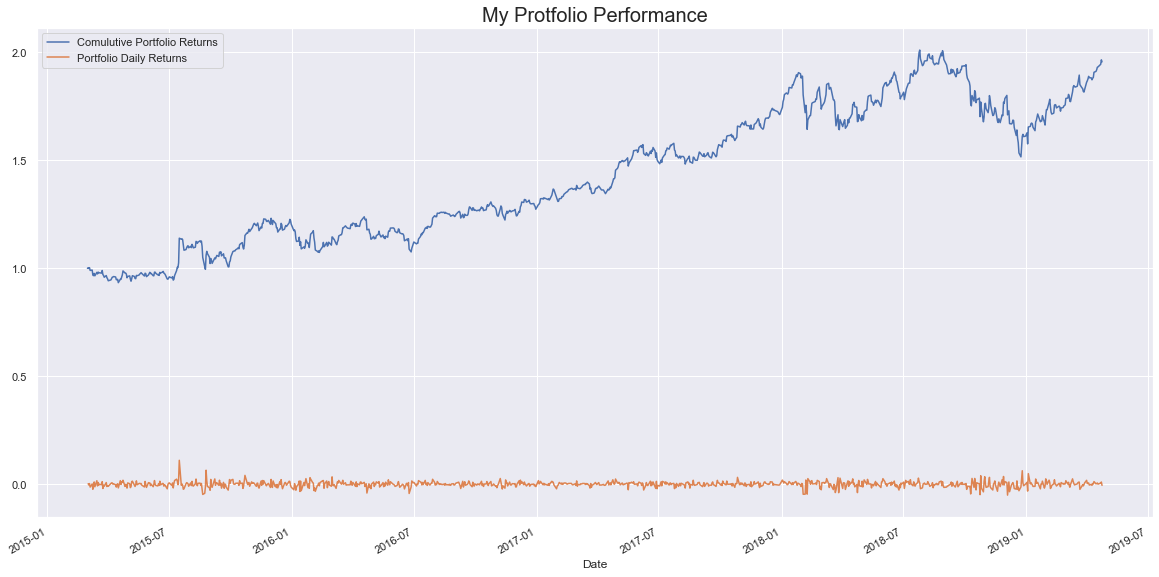

In [102]:
# Display sample data
ax = (my_portfolio_prices/my_portfolio_prices.iloc[0]).plot(figsize=(20,10))
my_portfolio_returns.plot(figsize=(20,10),ax=ax)
ax.legend(['Comulutive Portfolio Returns', 'Portfolio Daily Returns'])
ax.set_title('My Protfolio Performance', fontsize=20)
None

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [103]:
# Join your returns DataFrame to the original returns DataFrame
new_returns = daily_returns.merge(my_portfolio_returns, left_index=True, right_index=True, how='inner')

In [104]:
new_returns.dropna(inplace=True)
new_returns.shape

(1043, 8)

In [105]:
new_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500,my_portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,0.002852
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.003188
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.003462
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.012712
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.001788


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [106]:
# Calculate the annualized `std`
new_portfolios_std = new_returns.std()

new_portfolios_std_annualized = new_portfolios_std * np.sqrt(252)
print(new_portfolios_std_annualized)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
sp500                          0.135786
my_portfolio                   0.203604
dtype: float64


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

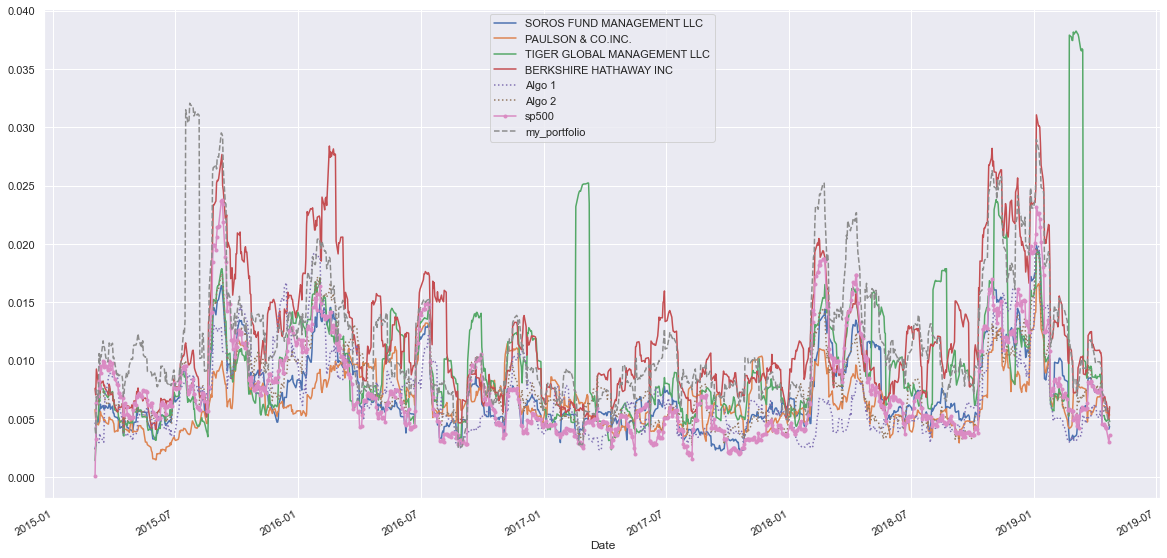

In [107]:
# Calculate rolling standard deviation
new_rolling_std = new_returns.rolling(window_21).std()
# Plot the rolling standard deviation
new_rolling_std.plot(figsize=(20, 10), style=['-','-','-','-',':',':','.-','--'])

### Calculate and plot the correlation

Portfolio Algo 2 is the most correlated with SP500


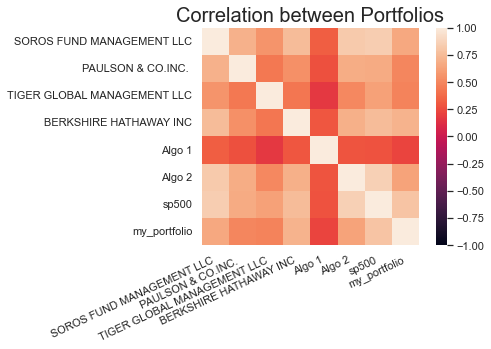

In [119]:
new_portfolio_correlation = plot_correlation(new_returns)


# new most correlated portfolio
new_idx_best = new_portfolio_correlation.loc['sp500', new_portfolio_correlation.keys() != 'sp500'].argmax()
new_key_best = new_returns.keys()[new_idx_best]
print(f'Portfolio {key_best} is the most correlated with SP500')

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

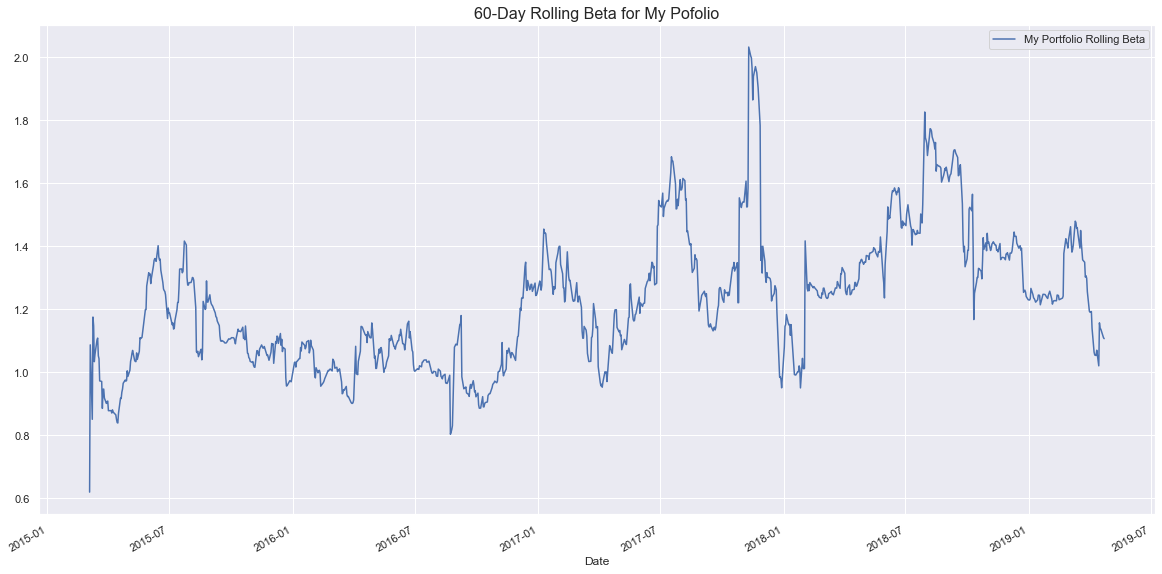

In [112]:
# Calculate and plot Beta
window_60 = pd.Timedelta(60, unit="d")
my_sp500_rolling_cov = new_returns['sp500'].rolling(window_60).cov(new_returns['my_portfolio'])

beta_my_sp500_rolling = my_sp500_rolling_cov/sp500_rolling_var
beta_my_sp500_rolling.dropna(inplace=True)

fig, ax = plt.subplots()
beta_my_sp500_rolling[1:].plot(figsize=(20,10),ax=ax)
ax.set_title('60-Day Rolling Beta for My Pofolio', fontsize=16)
ax.legend([f'My Portfolio Rolling Beta'])
None

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [113]:
# Calculate Annualized Sharpe Ratios
new_annualized_sharpe_ratios = new_returns.mean() * 252 / new_portfolios_std_annualized

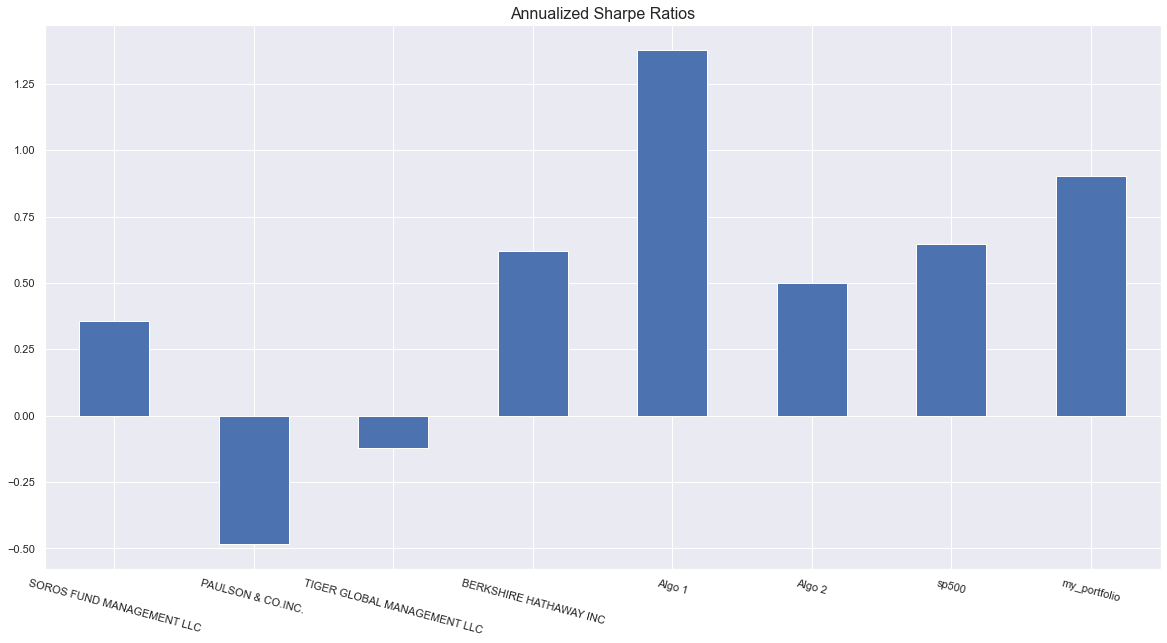

In [121]:
# Visualize the sharpe ratios as a bar plot
#ax = new_annualized_sharpe_ratios.plot.bar(figsize=(20,10))
#ax.set_title('Sharpe Ratios', fontsize=20)
#plt.show()
plot_annualized_sharpe(new_annualized_sharpe_ratios)

### How does your portfolio do?

My portfolio is doing better than S&P500 and is second best portfolio in a set.